<a href="https://colab.research.google.com/github/deivosarthur/alura-store-data-analysis/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [36]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna tienda
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Convertir columnas monetarias a entero
tienda1["Precio"] = tienda1["Precio"].astype(int)
tienda2["Precio"] = tienda2["Precio"].astype(int)
tienda3["Precio"] = tienda3["Precio"].astype(int)
tienda4["Precio"] = tienda4["Precio"].astype(int)

tienda1["Costo de envío"] = tienda1["Costo de envío"].astype(int)
tienda2["Costo de envío"] = tienda2["Costo de envío"].astype(int)
tienda3["Costo de envío"] = tienda3["Costo de envío"].astype(int)
tienda4["Costo de envío"] = tienda4["Costo de envío"].astype(int)



df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df_total.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300,6900,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300,8400,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600,15900,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500,41000,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200,20200,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


En esta etapa se cargaron los datos de las cuatro tiendas desde archivos CSV, se agregó una columna identificando cada tienda y se realizó una limpieza básica de los datos, convirtiendo las columnas monetarias a formato entero para facilitar el análisis posterior.

#1. Análisis de facturación



In [86]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fac_tda_1 = tienda1["Precio"].sum()
fac_tda_2 = tienda2["Precio"].sum()
fac_tda_3 = tienda3["Precio"].sum()
fac_tda_4 = tienda4["Precio"].sum()


fac_tda_1, fac_tda_2, fac_tda_3, fac_tda_4

facturacion = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Facturación Total": [
        fac_tda_1,
        fac_tda_2,
        fac_tda_3,
        fac_tda_4
    ]
})

facturacion





,Tienda,Facturación Total
0,Tienda 1,1150880400
1,Tienda 2,1116343500
2,Tienda 3,1098019600
3,Tienda 4,1038375700


Se calculó la facturación total de cada tienda sumando los valores de la columna Precio.

Los resultados muestran diferencias claras en el desempeño financiero entre las tiendas, poniendo a la tienda 1 y la tienda 2 las que mas facturan.

# 2. Ventas por categoría

In [87]:
ventas_categoria_tienda = (
    df_total
    .groupby(["Tienda", "Categoría del Producto"])
    .size()
    .reset_index(name="Cantidad de Ventas")
)
top_categorias = (
    ventas_categoria_tienda
    .sort_values(["Tienda", "Cantidad de Ventas"], ascending=[True, False])
    .groupby("Tienda")
    .head(1)
)

top_categorias


,Tienda,Categoría del Producto,Cantidad de Ventas
7,Tienda 1,Muebles,465
15,Tienda 2,Muebles,442
23,Tienda 3,Muebles,499
31,Tienda 4,Muebles,480


En este análisis se calculó la cantidad de productos vendidos por categoría en cada tienda, agrupando los datos por Tienda y Categoría del Producto y contando el número de ventas.

Dando como resultado que lo que mas venden las tiendas son muebles y electrodomesticos.



# 3. Calificación promedio de la tienda


In [68]:
envio_prom_tda_1 = round(tienda1["Costo de envío"].mean())
envio_prom_tda_2 = round(tienda2["Costo de envío"].mean())
envio_prom_tda_3 = round(tienda3["Costo de envío"].mean())
envio_prom_tda_4 = round(tienda4["Costo de envío"].mean())

envio_prom_tda_1, envio_prom_tda_2, envio_prom_tda_3, envio_prom_tda_4

envio_promedio = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo de Envío Promedio": [
        envio_prom_tda_1,
        envio_prom_tda_2,
        envio_prom_tda_3,
        envio_prom_tda_4
    ]
})
envio_promedio



,Tienda,Costo de Envío Promedio
0,Tienda 1,26019
1,Tienda 2,25216
2,Tienda 3,24806
3,Tienda 4,23459


El costo de envío promedio se calculó a partir de los valores individuales de cada venta. Dado que cada fila del conjunto de datos representa un producto vendido con su respectivo costo de envío, este promedio ya refleja el costo medio de envío por producto en cada tienda.

**Grafico visual:**

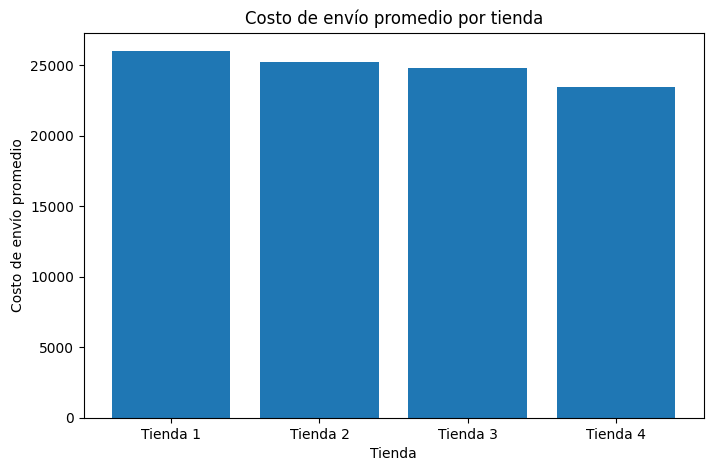

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    envio_promedio["Tienda"],
    envio_promedio["Costo de Envío Promedio"]
)

plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.show()

# 4. Productos más y menos vendidos

In [71]:
ventas_producto = (
    df_total
    .groupby(["Tienda", "Producto"])
    .size()
    .reset_index(name="Cantidad de Ventas")
)



mas_vendidos = (
    ventas_producto
    .sort_values(["Tienda", "Cantidad de Ventas"], ascending=[True, False])
    .groupby("Tienda")
    .head(1)
)

mas_vendidos



,Tienda,Producto,Cantidad de Ventas
1,Tienda 1,Armario,60
75,Tienda 2,Iniciando en programación,65
129,Tienda 3,Kit de bancas,57
163,Tienda 4,Cama box,62


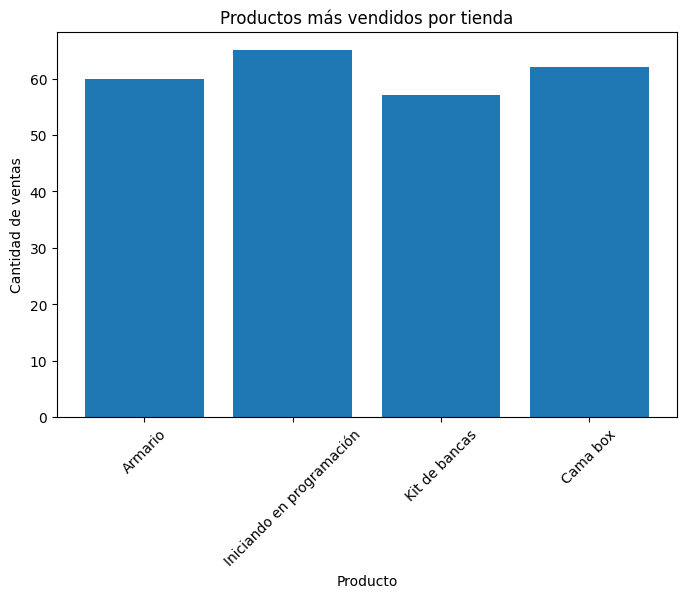

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    mas_vendidos["Producto"],
    mas_vendidos["Cantidad de Ventas"]
)

plt.title("Productos más vendidos por tienda")
plt.xlabel("Producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()


In [72]:
menos_vendidos = (
    ventas_producto
    .sort_values(["Tienda", "Cantidad de Ventas"], ascending=[True, True])
    .groupby("Tienda")
    .head(1)
)

menos_vendidos

,Tienda,Producto,Cantidad de Ventas
4,Tienda 1,Auriculares con micrófono,33
77,Tienda 2,Juego de mesa,32
111,Tienda 3,Bloques de construcción,35
175,Tienda 4,Guitarra eléctrica,33


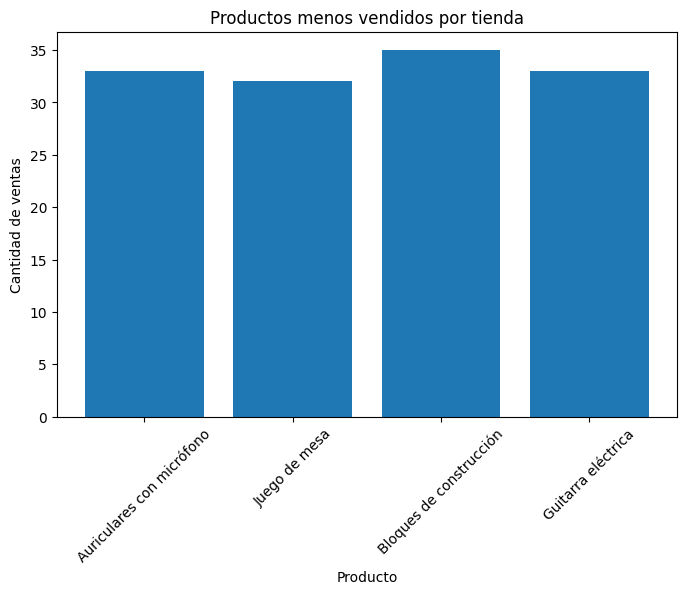

In [74]:
plt.figure(figsize=(8,5))
plt.bar(
    menos_vendidos["Producto"],
    menos_vendidos["Cantidad de Ventas"]
)

plt.title("Productos menos vendidos por tienda")
plt.xlabel("Producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()


En este análisis se identificaron los productos más vendidos y menos vendidos en cada tienda, contando la cantidad de ventas por producto.

Los resultados permiten observar qué productos destacan en ventas dentro de cada tienda y cuáles presentan un menor desempeño, aportando información adicional para evaluar la eficiencia comercial de cada una.

# 5. Envío promedio por tienda

In [77]:
calif_prom_tda_1 = tienda1["Calificación"].mean()
calif_prom_tda_2 = tienda2["Calificación"].mean()
calif_prom_tda_3 = tienda3["Calificación"].mean()
calif_prom_tda_4 = tienda4["Calificación"].mean()

calif_prom_tda_1, calif_prom_tda_2, calif_prom_tda_3, calif_prom_tda_4


calificaciones = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [
        calif_prom_tda_1,
        calif_prom_tda_2,
        calif_prom_tda_3,
        calif_prom_tda_4
    ]
})

calificaciones = calificaciones.sort_values(
    by="Calificación Promedio",
    ascending=False
)

calificaciones


,Tienda,Calificación Promedio
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


En este análisis se calculó la calificación promedio de los clientes para cada tienda, utilizando la media de las valoraciones registradas.

Esta métrica permite evaluar el nivel de satisfacción de los clientes y comparar el desempeño de las tiendas desde la perspectiva del consumidor.

GRafico visual  

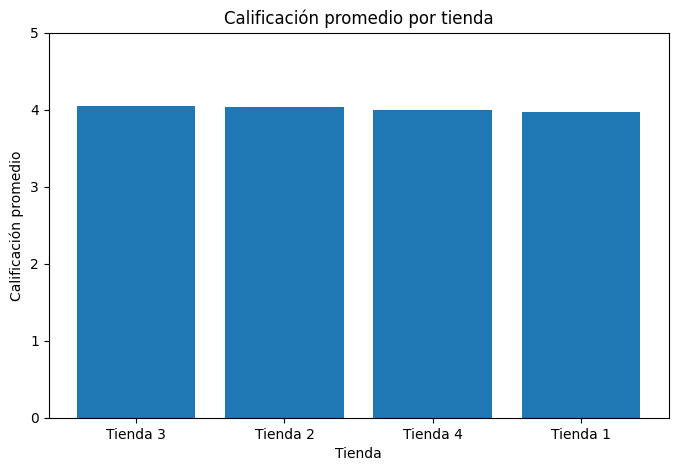

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    calificaciones["Tienda"],
    calificaciones["Calificación Promedio"]
)

plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)
plt.show()


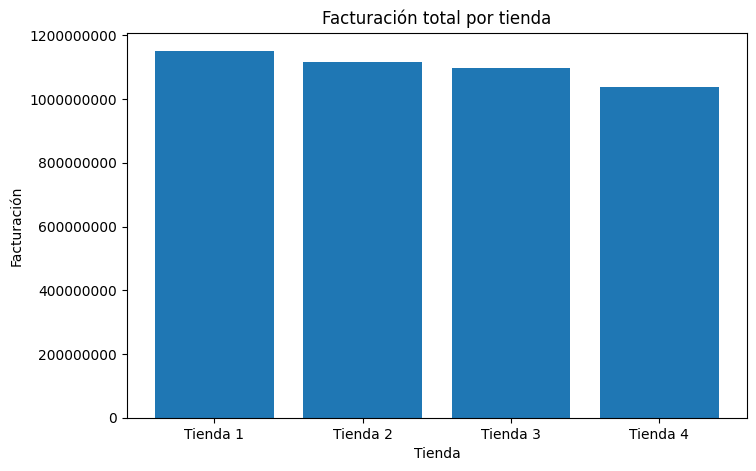

In [79]:
import matplotlib.pyplot as plt
#GRAFICO 1: Facturación total por tienda (barras)
plt.figure(figsize=(8,5))
plt.bar(
    facturacion["Tienda"],
    facturacion["Facturación Total"]
)

plt.title("Facturación total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación")

plt.ticklabel_format(style='plain', axis='y')

plt.show()


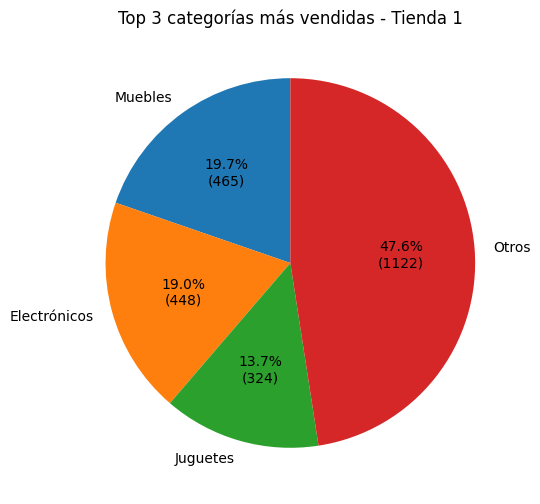

Categoría menos vendida en Tienda 1: Artículos para el hogar (171 ventas - 7.25%)
------------------------------------------------------------


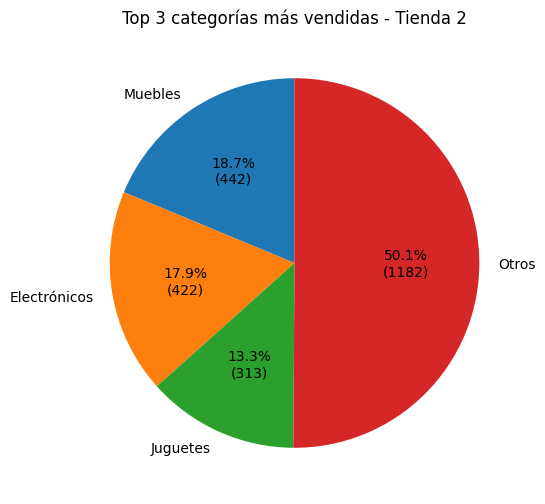

Categoría menos vendida en Tienda 2: Artículos para el hogar (181 ventas - 7.67%)
------------------------------------------------------------


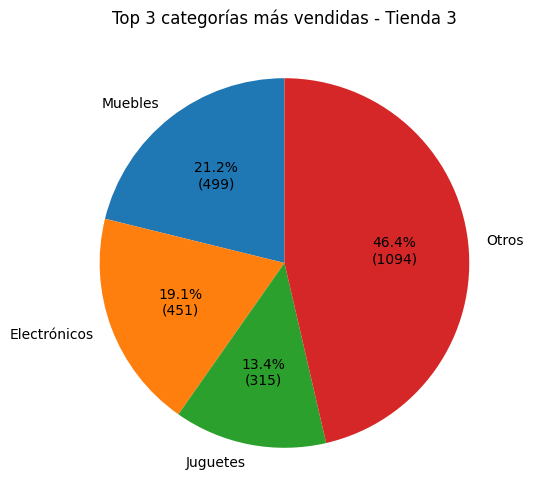

Categoría menos vendida en Tienda 3: Artículos para el hogar (177 ventas - 7.50%)
------------------------------------------------------------


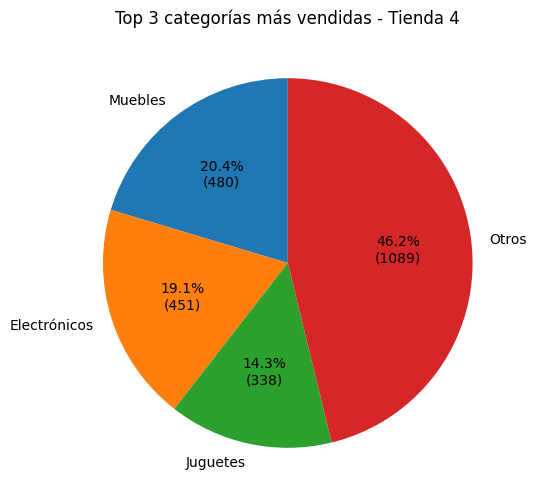

Categoría menos vendida en Tienda 4: Instrumentos musicales (170 ventas - 7.21%)
------------------------------------------------------------


In [93]:
#GRÁFICO 2: Categorías más populares por tienda (gráfico circular)


import matplotlib.pyplot as plt

# Función para mostrar porcentaje + cantidad
def formato_etiqueta(pct, valores):
    total = sum(valores)
    cantidad = int(round(pct * total / 100))
    return f"{pct:.1f}%\n({cantidad})"

# Lista de tiendas
tiendas = df_total["Tienda"].unique()

for tienda in tiendas:

    # Filtrar datos por tienda
    df_tienda = df_total[df_total["Tienda"] == tienda]

    # Contar ventas por categoría
    ventas_categoria = (
        df_tienda
        .groupby("Categoría del Producto")
        .size()
        .sort_values(ascending=False)
    )

    # Tomar Top 3
    top3 = ventas_categoria.head(3)

    # Agrupar resto en "Otros"
    otros = ventas_categoria.iloc[3:].sum()

    distribucion_final = top3.copy()
    distribucion_final["Otros"] = otros

    # Crear gráfico
    plt.figure(figsize=(6,6))

    plt.pie(
        distribucion_final,
        labels=distribucion_final.index,
        autopct=lambda pct: formato_etiqueta(pct, distribucion_final),
        startangle=90
    )

    plt.title(f"Top 3 categorías más vendidas - {tienda}")
    plt.show()

    # 🔎 Categoría menos vendida
    categoria_menos = ventas_categoria.idxmin()
    cantidad_menos = ventas_categoria.min()
    total_ventas = ventas_categoria.sum()
    porcentaje_menos = (cantidad_menos / total_ventas) * 100

    print(f"Categoría menos vendida en {tienda}: "
          f"{categoria_menos} ({cantidad_menos} ventas - {porcentaje_menos:.2f}%)")

    print("-" * 60)



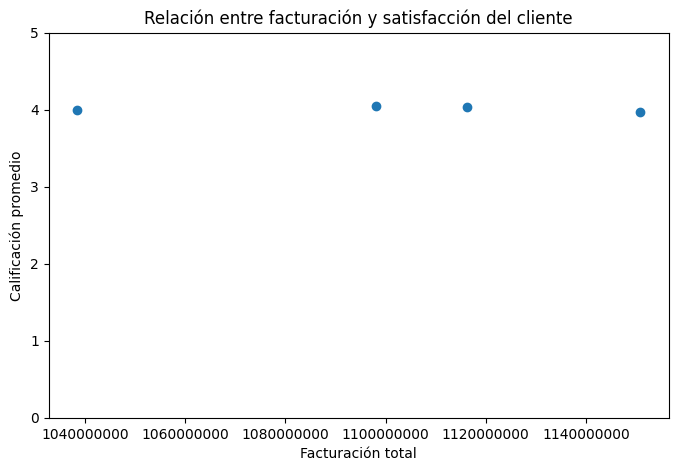

In [83]:
#GRÁFICO 3: Relación entre facturación y satisfacción (dispersión)
resumen = facturacion.merge(
    calificaciones,
    on="Tienda"
)

plt.figure(figsize=(8,5))
plt.scatter(
    resumen["Facturación Total"],
    resumen["Calificación Promedio"]
)

plt.title("Relación entre facturación y satisfacción del cliente")
plt.xlabel("Facturación total")
plt.ylabel("Calificación promedio")

plt.ticklabel_format(style='plain', axis='x')
plt.ylim(0, 5)

plt.show()



**Informe Final – Análisis de Alura Store**

# **Introducción**

El objetivo de este análisis fue evaluar el desempeño de las cuatro tiendas para recomendar cuál debería vender el Sr. Juan. Para ello, se analizaron indicadores financieros, de ventas y de satisfacción del cliente a partir de los datos disponibles.

# **Desarrollo del análisis**

# Resultados del análisis

La facturación total por tienda fue la siguiente:

1.   Tienda 1: $1.150.880.400
2.   Tienda 2: $1.116.343.500
3.   Tienda 3: $1.098.019.600
4.   Tienda 4: $1.038.375.700

Se observa que la Tienda 4 presenta la menor facturación total, lo que indica un menor desempeño financiero en comparación con las demás.


# Categorías de productos:

En todas las tiendas, la categoría “Muebles” fue la más vendida:

1.   Tienda 1: 465 ventas
2.   Tienda 2: 442 ventas
3.   Tienda 3: 499 ventas
4.   Tienda 4: 480 ventas

Esto muestra que la categoría Muebles es el principal motor de ventas en la cadena. Sin embargo, aunque Tienda 4 tiene buen volumen en esta categoría, su facturación total sigue siendo la más baja.

          

# Calificación promedio:

Las calificaciones promedio fueron:

1.   Tienda 3: 4.05
2.   Tienda 2: 4.04
3.   Tienda 4: 4.00
4.   Tienda 1: 3.98

La Tienda 3 presenta el mayor nivel de satisfacción, mientras que la Tienda 1 obtiene la calificación más baja. No obstante, las diferencias son relativamente pequeñas y todas las tiendas mantienen valoraciones cercanas a 4 puntos.

# Productos más y menos vendidos:

**Productos más vendidos:**

1.   Tienda 1: Armario (60 ventas)
2.   Tienda 2: Iniciando en programación (65 ventas)
3.   Tienda 3: Kit de bancas (57 ventas)
4.   Tienda 4: Cama box (62 ventas)

**Productos menos vendidos:**

1.   Tienda 1: Auriculares con micrófono (33 ventas)
2.   Tienda 2: Juego de mesa (32 ventas)
3.   Tienda 3: Bloques de construcción (35 ventas)
4.   Tienda 4: Guitarra eléctrica (33 ventas)

Se observa que los niveles de ventas de los productos más y menos vendidos son relativamente similares entre tiendas, por lo que esta variable no genera una diferencia significativa entre ellas.

**Costo de envío:**
 El costo de envío promedio por tienda fue:

1.   Tienda 1: $26.019

2.   Tienda 2: $25.216

3.   Tienda 3: $24.806

4.   Tienda 4: $23.459

Si bien el costo de envío es asumido por el cliente y no representa un gasto directo para la tienda, puede influir en la decisión de compra. En este caso, la Tienda 4 presenta el costo de envío más bajo; sin embargo, esto no se traduce en mayores ingresos, ya que continúa siendo la tienda con menor facturación total.

**Conclusión y recomendación**

Considerando todos los factores analizados —facturación total, categorías vendidas, productos destacados, calificación promedio y costo de envío— se concluye que la Tienda 4 es la que presenta el desempeño general más bajo, principalmente debido a que registra la menor facturación total entre las cuatro tiendas.

Aunque la Tienda 4 presenta el costo de envío más bajo y una calificación aceptable, estos factores no compensan su menor nivel de ingresos. Por lo tanto, desde una perspectiva financiera y estratégica, se recomienda que el Sr. Juan venda la Tienda 4 y destine esos recursos a un nuevo emprendimiento con mayor potencial de crecimiento.

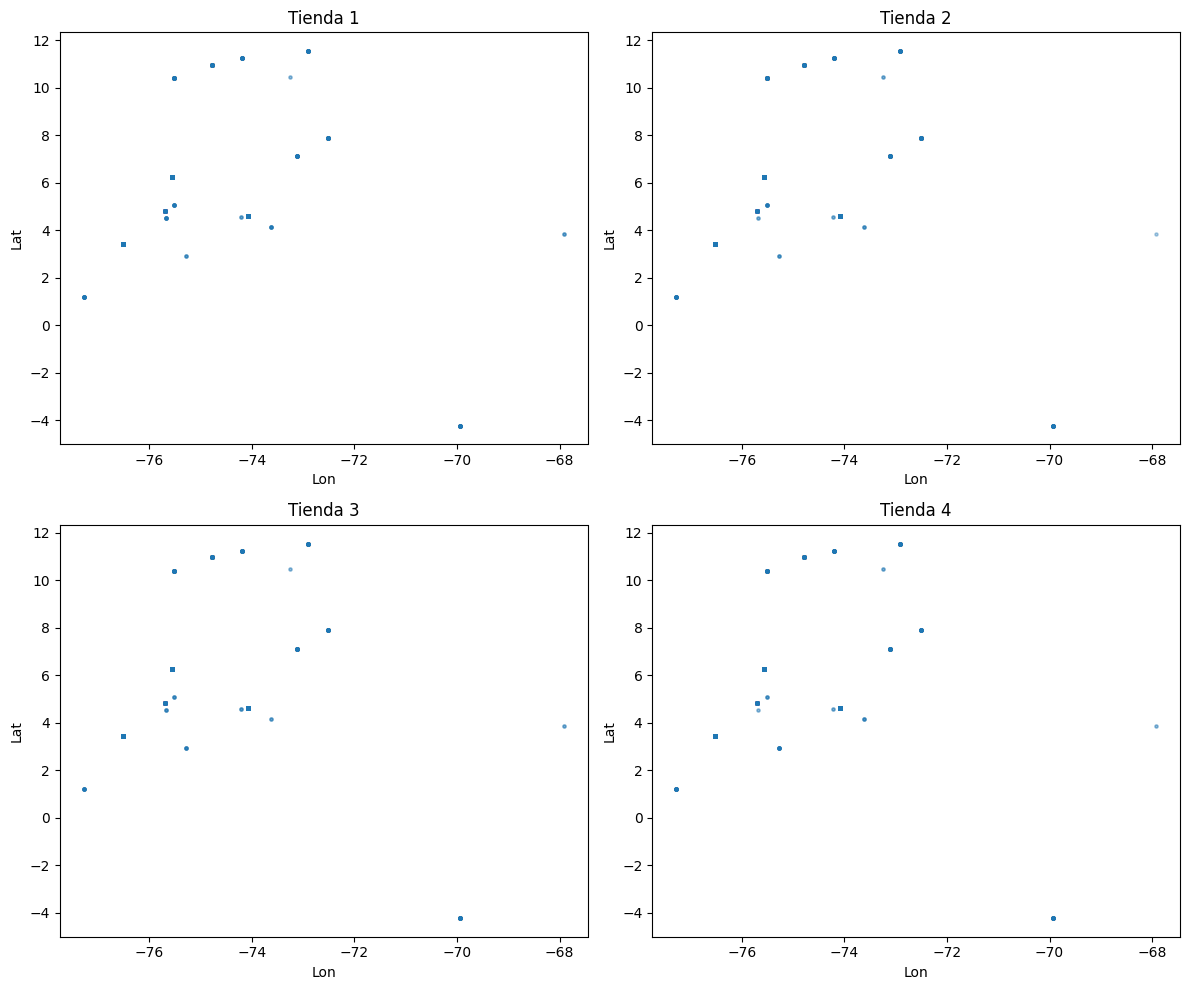

In [102]:
#extra : Distribución geográfica de ventas (dispersión)


import matplotlib.pyplot as plt

tiendas = df_total["Tienda"].unique()

fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

for i, tienda in enumerate(tiendas):

    df_tienda = df_total[df_total["Tienda"] == tienda]

    axes[i].scatter(
        df_tienda["lon"],
        df_tienda["lat"],
        s=5,
        alpha=0.2
    )

    axes[i].set_title(tienda)
    axes[i].set_xlabel("Lon")
    axes[i].set_ylabel("Lat")

plt.tight_layout()
plt.show()




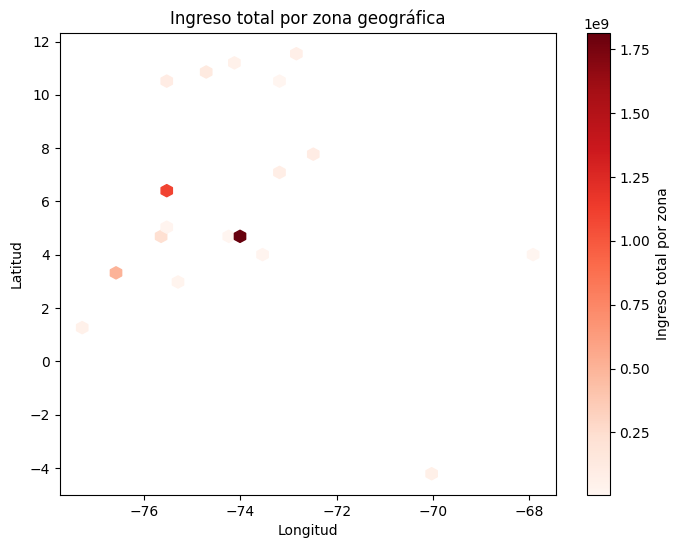

In [108]:
#EXTRA: GRÁFICO 2: Mapa por tienda (colores distintos)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

colores = {
    "Tienda 1": "blue",
    "Tienda 2": "green",
    "Tienda 3": "orange",
    "Tienda 4": "red"
}

for tienda, color in colores.items():

    df_tienda = df_total[df_total["Tienda"] == tienda]

    plt.scatter(
        df_tienda["lon"],
        df_tienda["lat"],
        s=6,            # tamaño pequeño
        alpha=0.25,     # transparencia para evitar saturación
        color=color,
        label=tienda
    )

plt.title("Distribución geográfica de ventas por tienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.show()





El análisis geográfico mostró que las cuatro tiendas comparten cobertura territorial similar, ya que las ventas se distribuyen en las mismas regiones. Esto indica que el bajo desempeño de la Tienda 4 no se debe a una menor presencia geográfica, sino a factores comerciales y financieros previamente analizados.